### Numpy basics

In [325]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt 

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [21]:
m = np.arange(12).reshape((3,4))

# row means
rows = np.mean(m, axis = 1) 
print(rows)

# column means
cols = np.mean(m, axis = 0) 
print(cols)

# overall means
overall = np.mean(m)
print(overall)

[1.5 5.5 9.5]
[4. 5. 6. 7.]
5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [49]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# outer product using the function outer in numpy
print("outer product using the function outer in numpy:")
op = np.outer(u, v)
print(op)

# outer product using a nested for loop or list comprehension
print("\nouter product using a nested for loop or list comprehension:")
op1 = [[i*j for i in v] for j in u]
print(op1)

# outer product using numpy broadcasting operatoins
print("\nouter product using numpy broadcasting operations:")
op2 = u[..., None] * v
print(op2)

outer product using the function outer in numpy:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

outer product using a nested for loop or list comprehension:
[[2, 4, 6, 8], [6, 12, 18, 24], [10, 20, 30, 40], [14, 28, 42, 56]]

outer product using numpy broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [97]:
mtx = np.random.rand(10,6)
mask = (mtx < 0.1) # find all the elements less than 0.1

find = np.any(mask, axis=1) # mask of the rows with a value less than 0.1

for i in range (len(find)):
    if find[i] == True:
        mtx[i] = 0 # set to 0 the row with a True value for the condition

print(mtx)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.91946258 0.26720015 0.4377399  0.69169024 0.90145167 0.8593974 ]
 [0.15570998 0.59641645 0.7950386  0.21753758 0.56058491 0.90414649]
 [0.         0.         0.         0.         0.         0.        ]
 [0.10478965 0.14159131 0.85902027 0.7448761  0.67452353 0.84796581]
 [0.         0.         0.         0.         0.         0.        ]
 [0.77144437 0.30813634 0.40038997 0.19773274 0.93343369 0.38738292]
 [0.81667629 0.88419968 0.3367328  0.6959051  0.93339583 0.66640644]
 [0.46375813 0.49126959 0.75003518 0.25535885 0.86422975 0.62195121]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close



[0.7615982190520711, 0.8250647373064104, 3.8714576135146945, 3.934924131769034]


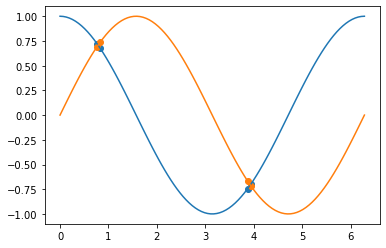

In [128]:
mtx = np.linspace(0, 2*np.pi, 100)

# Extract every 10th element using slice notation
mtx_sliced = mtx[10::10]
#print(mtx_sliced)
print()

# Reverse the array using slice notation
mtx_reverse = mtx[::-1]
#print(mtx_reverse)
print()

# Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
mtx_ext = [i for i in mtx if np.absolute((np.sin(i) - np.cos(i))) < 0.1 ]
mtx_abs = [np.absolute((np.sin(i) - np.cos(i))) for i in mtx if np.absolute((np.sin(i) - np.cos(i))) < 0.1 ]

# Make a plot showing the sin and cos functions and indicate where they are close
%matplotlib inline 
sin = np.sin(mtx) 
cos = np.cos(mtx)
plt.plot(mtx, cos, mtx, sin);
plt.scatter(mtx_ext, np.cos(mtx_ext)); # points that are close
plt.scatter(mtx_ext, np.sin(mtx_ext)); # points that are close

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [145]:
m1 = np.arange(1, 11)
m2 = np.arange(1, 11)

# matrix of 10by10 multiplication table
mlt= np.array([[i*j for i in m1] for j in m2])

# Find the trace of the matrix
print("trace = ", mlt.trace())

# Extract the anto-diagonal 
print("anti-diagonal = ", np.fliplr(mlt).diagonal()) # flip the matrix and take the diagonal

# Extract the diagnoal offset by 1 upwards
print("Diagonal offset by 1 = ", np.diagonal(mlt, 1))

trace =  385
anti-diagonal =  [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1 =  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [184]:
a = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
b = np.tile(a, (10, 1))
pos = np.array([np.absolute(b[:,i]-a) for i in range(len(a))]) # distance matrix generation
print(pos)

print()

# convertion from miles to km
converted = pos * 1.609344
#print(converted)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]



7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [229]:
# define function for compute primes
def primes(n):
    a = np.arange(n)
    mask = np.array([True for i in range(n)])
    for i in range(2, n):
        for j in range(2, n):
            if (j%i == 0) and j != i:
                mask[j] = False
    # set to false the first two elements     
    mask[0]= False
    mask[1]= False
    # apply mask to array 
    primes = a[mask]
    return  primes # array of primes


# define function for compute primes with sieve of eratosthenes
def sieve_eratosthenes(n):
    a = np.arange(n+1)
    mask = np.array([True for i in range(n+1)])
    p = 2
    while (p*p <= n): 
        if (mask[p] == True): 
            for i in range(p*2, n+1, p):
                mask[i] = False
        p += 1
    # set to false the first two elements
    mask[0]= False
    mask[1]= False

    # apply mask to array 
    primes = a[mask]
    return  primes # array of primes

# manually calculated 
n = np.array([10, 100, 1000, 10000])
for i in n:
    print("Performance for n = " + str(i))
    print("with method primes:")
    %timeit primes(i)
    print("with method optimization of eratosthenes:")
    %timeit sieve_eratosthenes(i) # much better in performance
    print()

Performance for n = 10
with method primes:
8.17 µs ± 94.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
with method optimization of eratosthenes:
7.98 µs ± 38.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Performance for n = 100
with method primes:
368 µs ± 3.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
with method optimization of eratosthenes:
26.8 µs ± 308 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Performance for n = 1000
with method primes:
41 ms ± 601 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
with method optimization of eratosthenes:
185 µs ± 3.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Performance for n = 10000
with method primes:
4.57 s ± 82.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
with method optimization of eratosthenes:
1.68 ms ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



---> The method created seems to scale exponentially while the optimization is much faster and the performance follows a linear increment.

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

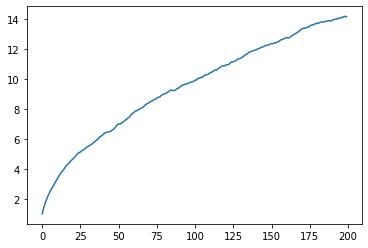

In [319]:
# creation of walkers
walkers = 1000
steps = 200

# creation of the steps for each walker
walks = npr.randint(0,2,size=(steps,walkers)) # in order to have 0s and 1s 
walks[walks == 0] = -1 # substitute 0s with -1

# calculating the distance of each walker
distance = np.zeros((200, 1000))
for i in range(walkers):
    summation = 0
    for j in range(steps):
        summation = summation + walks[j, i]
        distance[j, i] = summation
    
# square of distance
distance_square = np.square(distance)

# mean over the columns
mean_square_dist = np.mean(distance_square, axis = 1)

# plotting the result
%matplotlib inline 
plt.plot(np.sqrt(mean_square_dist));

I would expect a mean near 0, due to the fact that the steps are random and there is 0.5 probability. Instead the distance increase a little at each time step, probably diverging.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [230]:
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-10-27 17:32:01--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2020-10-27 17:32:01--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce991e3398bef3542fd97694598.dl.dropboxusercontent.com/cd/0/inline/BCGVRb0WOBkzxBWXAEM2gYaGDgJjIVsGvBXANO0tVA13K9HHeYJGMXIePCvg52u5F1GnfbAnq63xjkw_3QqMc5N8rWXAoLHnfGi0RAbkdQilTA/file# [following]
--2020-10-27 17:32:01--  https://uce991e3398bef3542fd97694598.dl.dropboxusercontent.com/cd/0/inline/BCGVRb0WOBkzxBWXAEM2gYaGDgJjIVsGvBXANO0tVA13K9HHeYJGMXIePCvg52u5F1GnfbAnq63xjkw_3QqMc5N8rWXAoLHnfGi0RAbkdQilTA/file
Resolvi

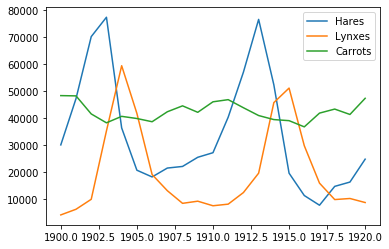


Statistical values for hares:
sum 715700.0
min 7600.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667

Statistical values for lynxes:
sum 423500.0
min 4000.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763

Statistical values for carrots:
sum 890400.0
min 36700.0
argmin 16
mean 42400.0
median 41800.0
std 3322.5062255844787

Species with highest population for each year:
['Carrot', 'Carrot', 'Hares', 'Hares', 'Lynxes', 'Lynxes', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Hares', 'Hares', 'Hares', 'Lynxes', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot']


In [368]:
# watching manually into the file
#! cat populations.txt

# import txt file data
filename = "populations.txt"
db = np.loadtxt(filename)

# devide the columns
year = np.array([i for i in db[:, 0]])
hares = np.array([i for i in db[:, 1]])
lynxes = np.array([i for i in db[:, 2]])
carrots = np.array([i for i in db[:, 3]])

all_a = np.array([hares, lynxes, carrots])
names = ["hares", "lynxes", "carrots"]

# plotting the population
%matplotlib inline 
plt.plot(year, hares, label="Hares") 
plt.plot(year, lynxes, label="Lynxes")
plt.plot(year, carrots, label="Carrots")
plt.legend()
plt.show()

# Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
for m in range(len(all_a)):
    print("\nStatistical values for "  + names[m] + ":")
    for function in ['sum','min','argmin','mean','median','std']:
        print (function, getattr(np, function)(all_a[m]))

# Which species has the highest population each year?
# find it old school
max_pop = [i for i in range(len(year))]
for i in range(len(year)):
    max_val = max(hares[i], lynxes[i], carrots[i])
    if max_val == hares[i]:
        max_pop[i] = "Hares"
    elif max_val == lynxes[i]:
        max_pop[i] = "Lynxes"
    elif max_val == carrots[i]:
        max_pop[i] = "Carrot"

print("\nSpecies with highest population for each year:")
print(max_pop)

The results agree with the study. In fact the population of hares increases every 8-11 years while right after there is decreases caused by the increment of the population of lynxes, that eat the hares. After the decrease of the hare population, lynx population follows the same path, due to the starvation caused by the decrement of hares (eaten by them). This behaviout is cyclic and follows the food chain.
In all of this, carrots have nearly the same population.